<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas--R/blob/main/Tidyverse/Summarize_y_Group_by.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summarize()**

El verbo summarize en el paquete dplyr de R te permite condensar múltiples observaciones en una sola estadistica resumida. Por ejemplo, puedes calcular la mediana de la esperanza de vida en todos los paises y añadirlos en el conjunto de datos gapminder


In [3]:
install.packages("tidyverse")
install.packages("gapminder") #Es una base de datos para practicar

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
# Cargar el paquete gapminder
library(gapminder)

# Cargar el paquete dplyr
library(dplyr)

library(ggplot2)

In [6]:
# Resumir para encontrar la mediana de la esperanza de vida
gapminder %>%
  summarize(medianLifeExp = median(lifeExp))

# Puedes filtrar y luego resumir
gapminder %>%
  filter(year == 1957) %>%
  summarize(medianLifeExp = median(lifeExp))


medianLifeExp
<dbl>
60.7125


medianLifeExp
<dbl>
48.3605


In [7]:
# Sirve para aplicar funciones a toda una o mas columnas
gapminder %>%
  filter(year == 1957) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))

medianLifeExp,maxGdpPercap
<dbl>,<dbl>
48.3605,113523.1


**group_by ()**

El verbo group_by en dplyr te permite realizar resúmenes dentro de grupos en lugar de resumir todo el conjunto de datos. Esto es útil cuando quieres analizar datos para cada año por separado,cesar como filtrar, pero por cada elemento



In [8]:
gapminder %>%
  group_by(year,country) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))%>%
  ungroup()%>%
  summarize(maxLifeExp = max(medianLifeExp))


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


maxLifeExp
<dbl>
82.603


In [9]:

# Puedes combinar filtros para seleccionar datos en específico
gapminder %>%
  filter(year == 1957) %>%
  group_by(continent) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))


continent,medianLifeExp,maxGdpPercap
<fct>,<dbl>,<dbl>
Africa,40.5925,5487.104
Americas,56.0740,14847.127
Asia,48.2840,113523.133
Europe,67.6500,17909.490
Oceania,70.2950,12247.395


Podemos ocupar mas de un conjunto, divide primero por continente y luego divide por año


In [11]:
a <- gapminder %>%
  group_by(continent, year) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))
head(a)

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


continent,year,medianLifeExp,maxGdpPercap
<fct>,<int>,<dbl>,<dbl>
Africa,1952,38.8330,4725.296
Africa,1957,40.5925,5487.104
Africa,1962,42.6305,6757.031
Africa,1967,44.6985,18772.752
Africa,1972,47.0315,21011.497
Africa,1977,49.2725,21951.212


**visualizar**


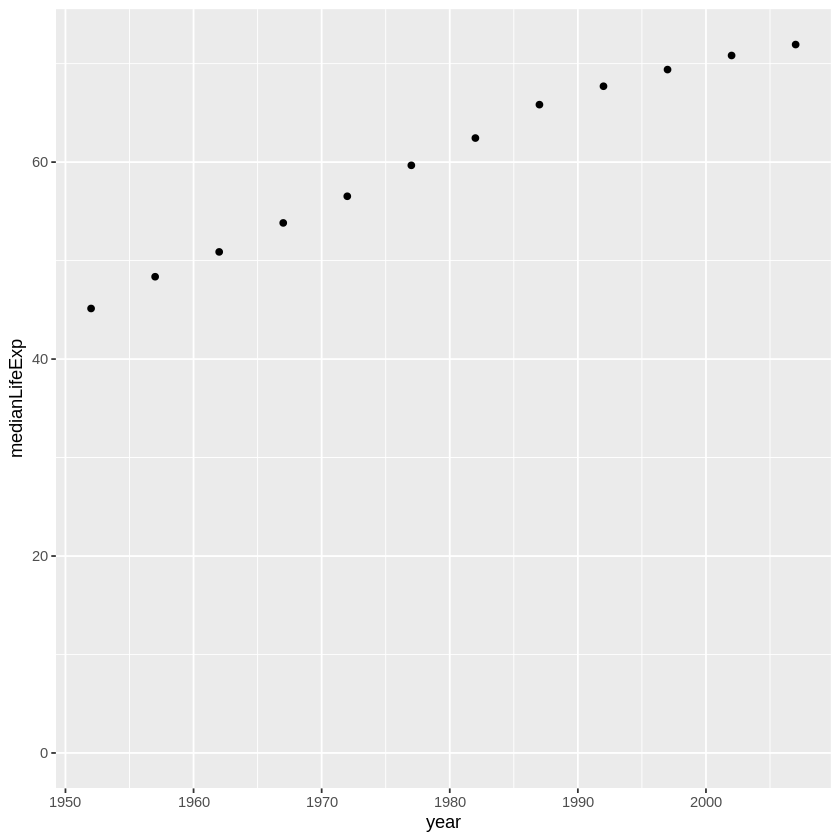

In [17]:
# Podemos ocupar los resumenes para visualizarlo
by_year <- gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))

# Crear un diagrama de dispersión que muestre el cambio en medianLifeExp a lo largo del tiempo
ggplot(by_year, aes(x = year, y = medianLifeExp)) +
  geom_point() +
  expand_limits(y = 0)


`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


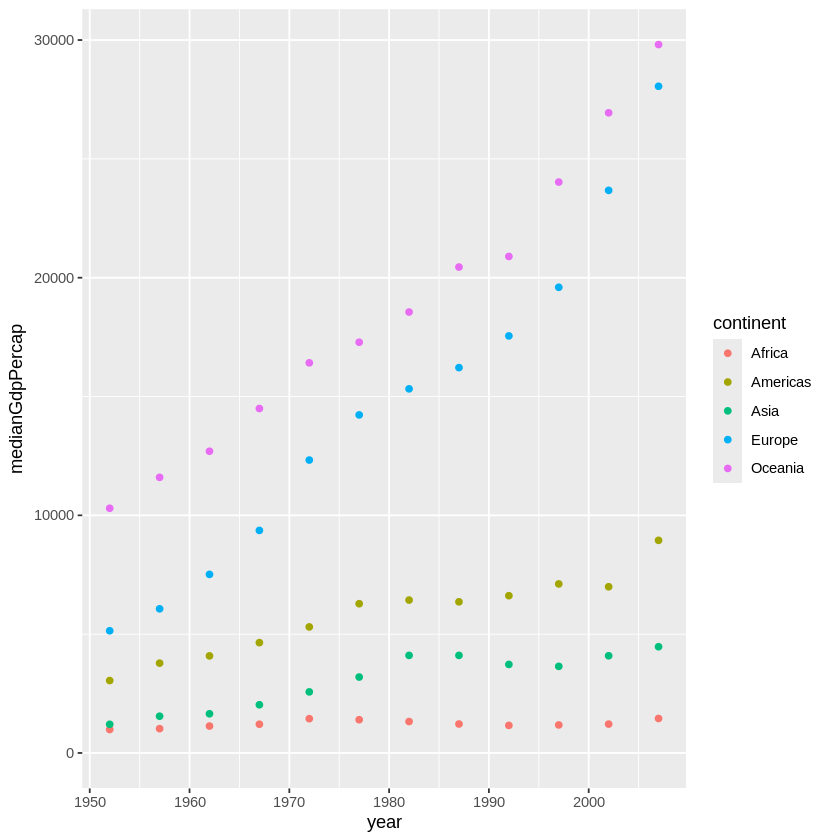

In [18]:
# Podemos graficar varios grupos
# Resumir median GdpPercap dentro de cada continente en cada año: by_year_continent

by_year_continent <- gapminder %>%
  group_by(continent, year) %>%
  summarize(medianGdpPercap = median(gdpPercap))

# Graficar el cambio en medianGdpPercap en cada continente a lo largo del tiempo
ggplot(by_year_continent, aes(x = year, y = medianGdpPercap, color = continent)) +
  geom_point() +
  expand_limits(y = 0)

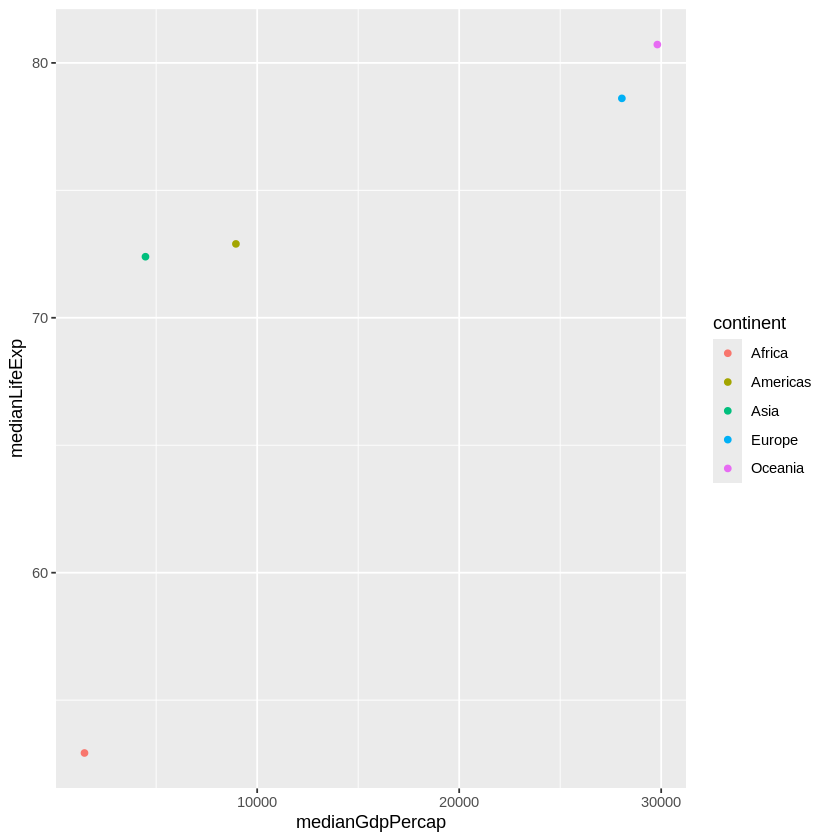

In [19]:
# Ejemplo con filtros
# Resumir el PIB mediano y la esperanza de vida mediana por continente en 2007
by_continent_2007 <- gapminder %>%
  filter(year == 2007) %>%
  group_by(continent) %>%
  summarize(medianGdpPercap = median(gdpPercap),
            medianLifeExp = median(lifeExp))

# Usar un diagrama de dispersión para comparar el PIB mediano y la esperanza de vida mediana
ggplot(by_continent_2007, aes(x = medianGdpPercap, y = medianLifeExp, color = continent)) +
  geom_point()
